In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [3]:
dataset_path = 'Dataset/Heart.csv'
data = pd.read_csv(dataset_path)

In [4]:
print("First five rows of the dataset")
print(data.head())

First five rows of the dataset
   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [5]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std  

In [6]:
for column in data.select_dtypes(include=np.number).columns:
    print(f'\nStatistics for {column}:')
    print(f'Mean: {data[column].mean()}')
    print(f'Median: {data[column].median()}')
    print(f'Variance: {data[column].var()}')
    print(f'Standard Deviation: {data[column].std()}')
    print(f'Skewness: {skew(data[column])}')
    print(f'Kurtosis: {kurtosis(data[column])}')


Statistics for Unnamed: 0:
Mean: 152.0
Median: 152.0
Variance: 7676.0
Standard Deviation: 87.61278445523804
Skewness: 0.0
Kurtosis: -1.2000261415127222

Statistics for Age:
Mean: 54.43894389438944
Median: 56.0
Variance: 81.69741874849738
Standard Deviation: 9.038662442446746
Skewness: -0.2080240895050745
Kurtosis: -0.5345227201725988

Statistics for Sex:
Mean: 0.6798679867986799
Median: 1.0
Variance: 0.21836819443533753
Standard Deviation: 0.46729882777012993
Skewness: -0.7710934616594495
Kurtosis: -1.4054148733860468

Statistics for RestBP:
Mean: 131.68976897689768
Median: 130.0
Variance: 309.7511201451271
Standard Deviation: 17.59974772958769
Skewness: 0.7025346112314821
Kurtosis: 0.8458812993442368

Statistics for Chol:
Mean: 246.69306930693068
Median: 241.0
Variance: 2680.849190217035
Standard Deviation: 51.77691754263704
Skewness: 1.1298741026270545
Kurtosis: 4.398208250636747

Statistics for Fbs:
Mean: 0.1485148514851485
Median: 0.0
Variance: 0.12687692610320636
Standard Deviati

In [7]:
print('\nCorrelation Matrix:')


Correlation Matrix:


In [8]:
numeric_data = data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

            Unnamed: 0       Age       Sex    RestBP      Chol       Fbs  \
Unnamed: 0    1.000000 -0.002367 -0.070849 -0.022028 -0.095518 -0.039471   
Age          -0.002367  1.000000 -0.097542  0.284946  0.208950  0.118530   
Sex          -0.070849 -0.097542  1.000000 -0.064456 -0.199915  0.047862   
RestBP       -0.022028  0.284946 -0.064456  1.000000  0.130120  0.175340   
Chol         -0.095518  0.208950 -0.199915  0.130120  1.000000  0.009841   
Fbs          -0.039471  0.118530  0.047862  0.175340  0.009841  1.000000   
RestECG      -0.150232  0.148868  0.021647  0.146560  0.171043  0.069564   
MaxHR        -0.105488 -0.393806 -0.048663 -0.045351 -0.003432 -0.007854   
ExAng        -0.000402  0.091661  0.146201  0.064762  0.061310  0.025665   
Oldpeak      -0.120384  0.203805  0.102173  0.189171  0.046564  0.005747   
Slope        -0.028458  0.161770  0.037533  0.117382 -0.004062  0.059894   
Ca            0.046938  0.362605  0.093185  0.098773  0.119000  0.145478   

           

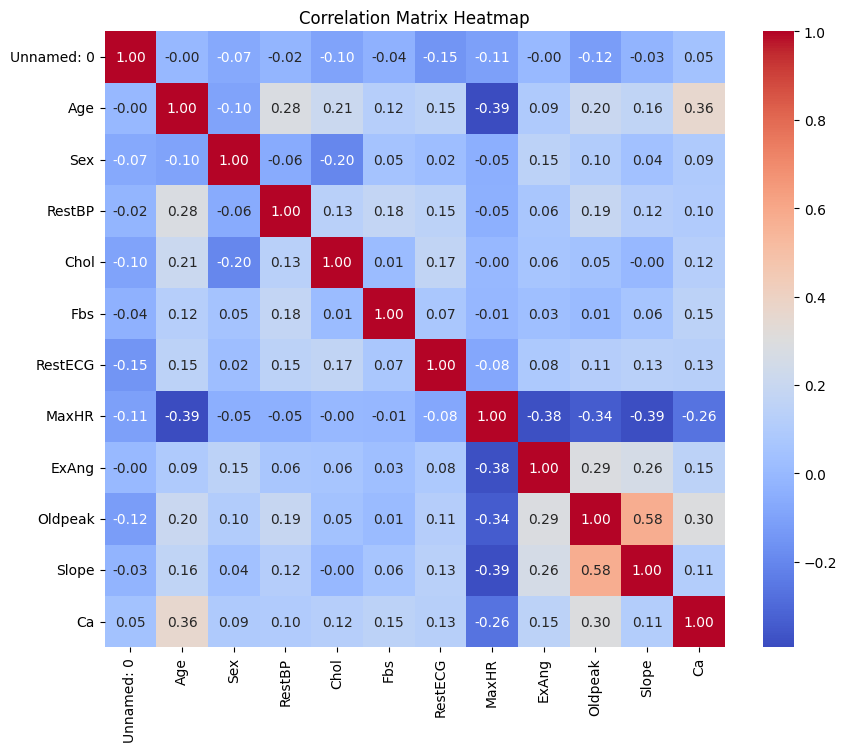

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
columns_to_plot = data.select_dtypes(include=np.number).columns

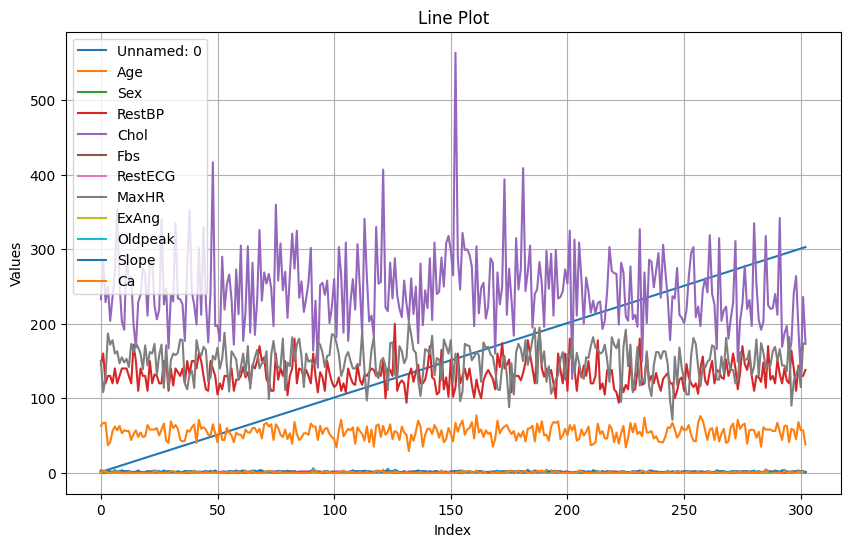

In [11]:
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(data.index, data[column], label=column)
plt.title('Line Plot')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

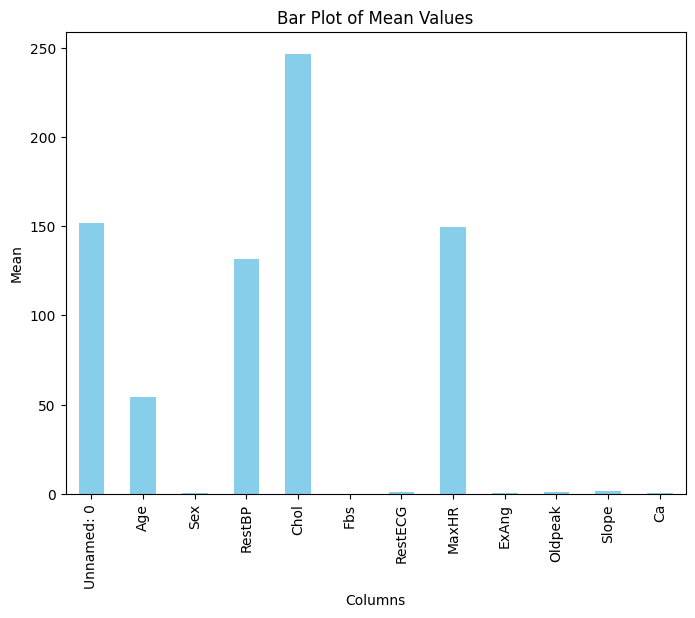

In [12]:
means = data[columns_to_plot].mean()
means.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Bar Plot of Mean Values')
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.show()

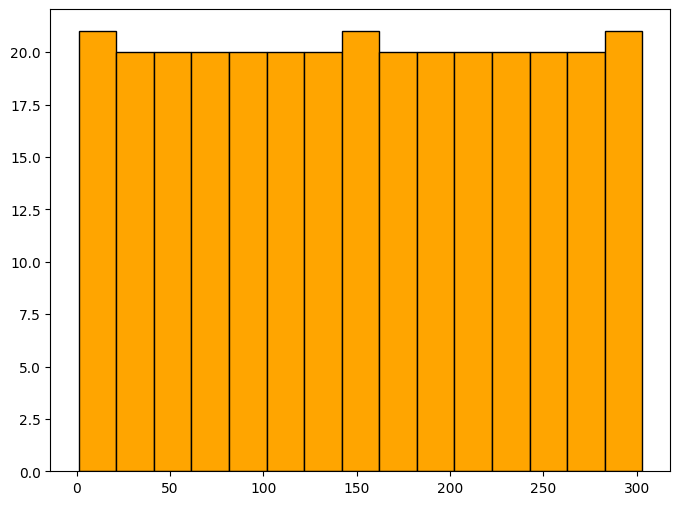

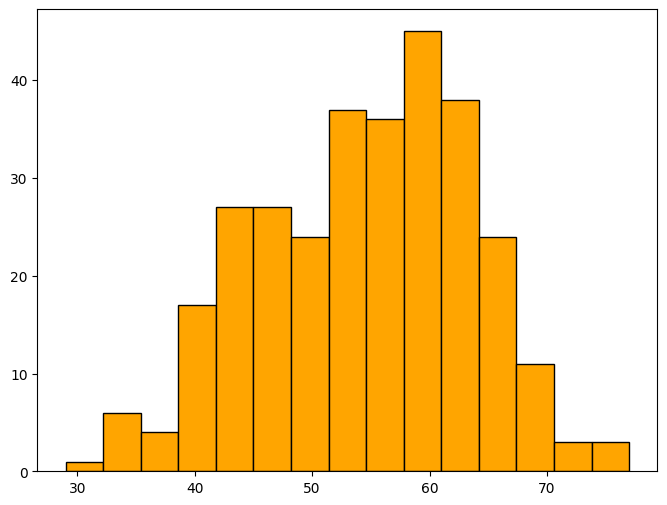

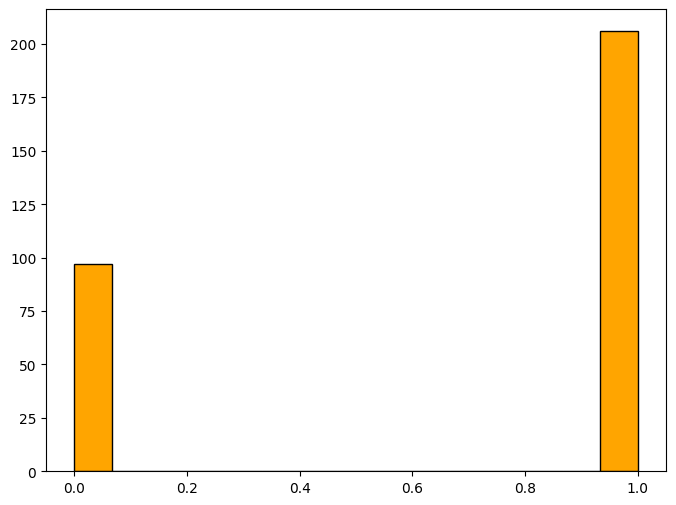

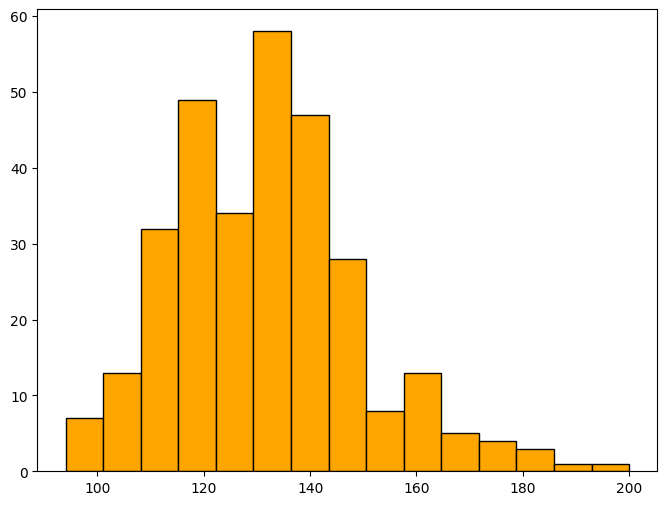

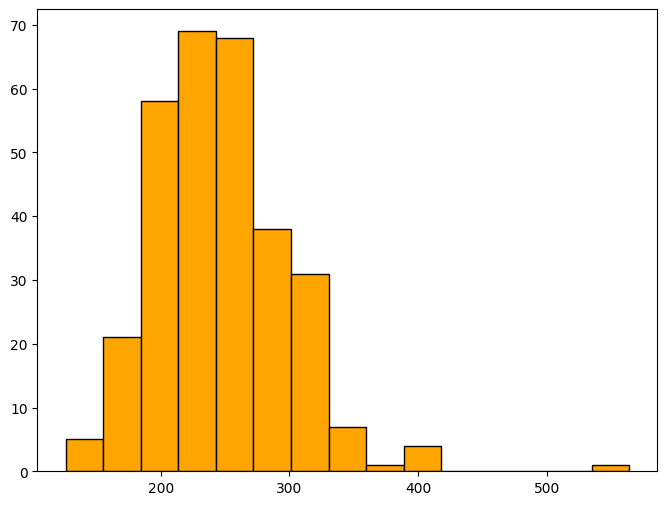

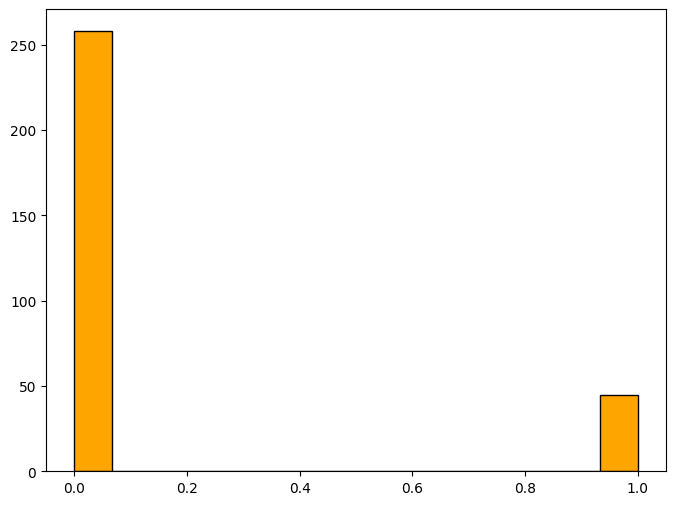

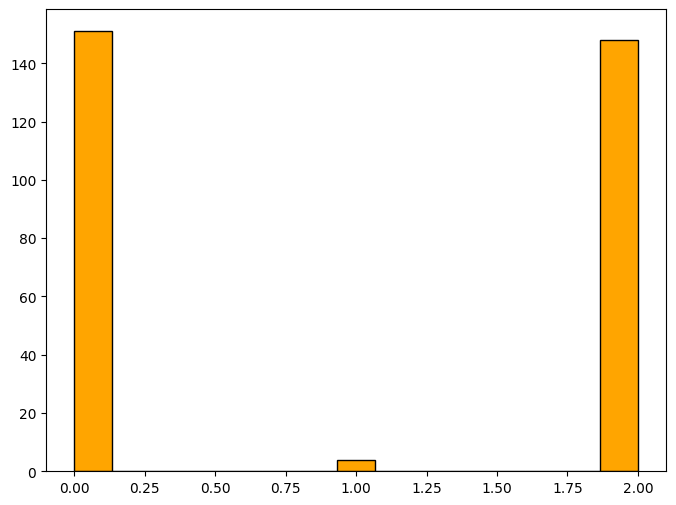

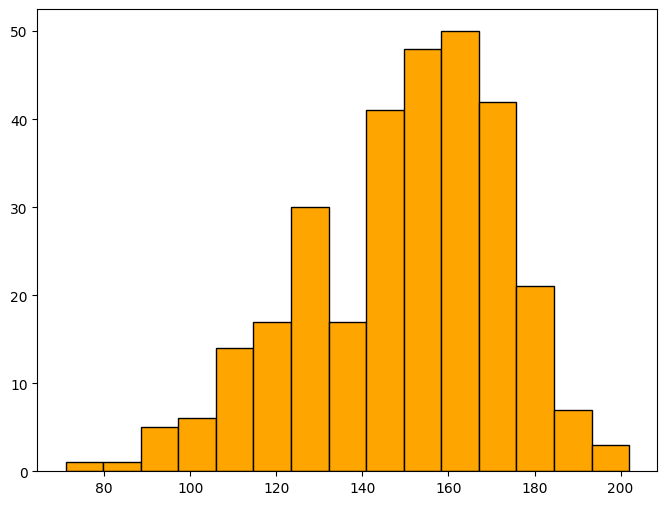

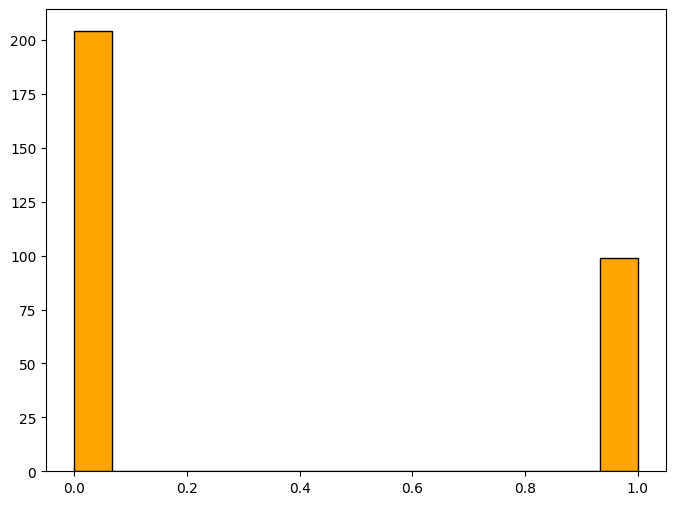

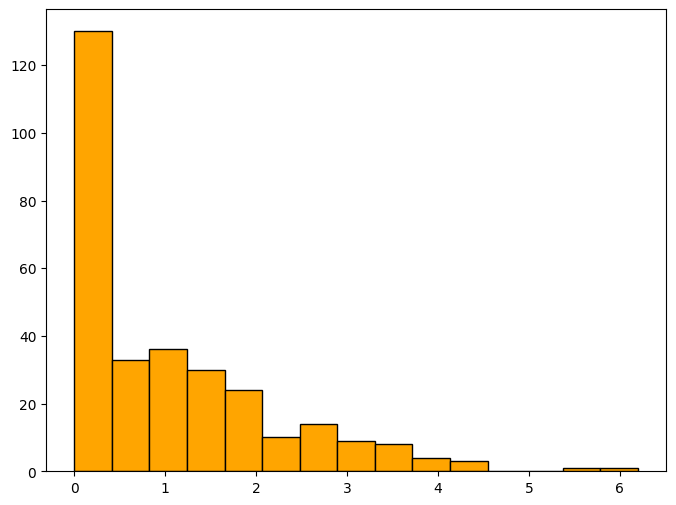

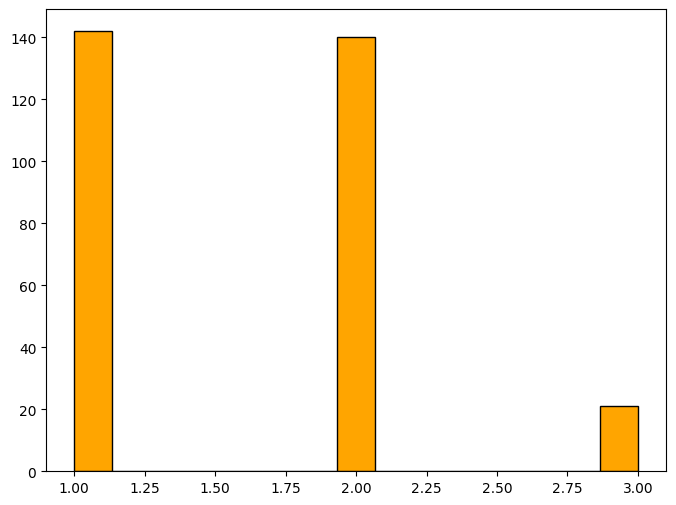

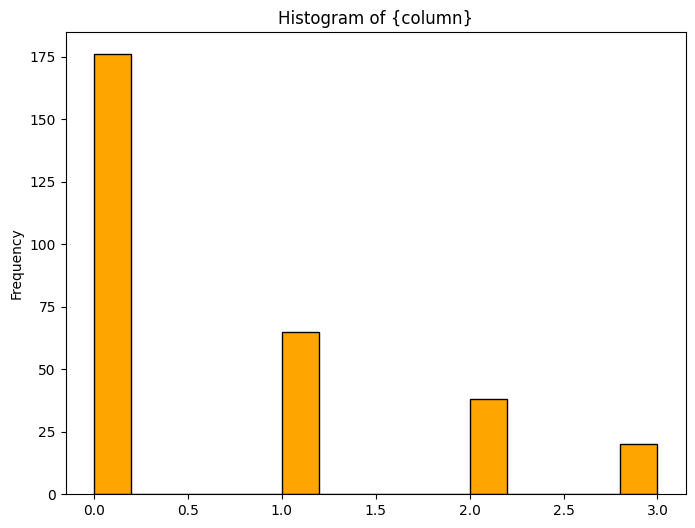

In [13]:
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=15, color='orange', edgecolor='black')
plt.title('Histogram of {column}')
plt.ylabel('Frequency')
plt.show()


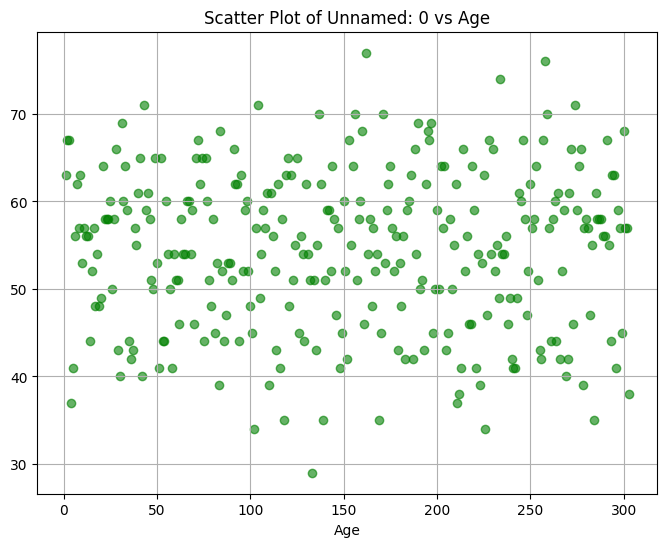

In [14]:
if len(columns_to_plot) >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[columns_to_plot[0]], data[columns_to_plot[1]], color='green', alpha=0.6)
    plt.title(f'Scatter Plot of {columns_to_plot[0]} vs {columns_to_plot[1]}')
    plt.xlabel(columns_to_plot[0]);
    plt.xlabel(columns_to_plot[1]);
    plt.grid()
    plt.show()